In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

2025-03-21 08:58:05.503694: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-21 08:58:06.880990: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-21 08:58:07.745119: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1742547488.329878    4448 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1742547488.473962    4448 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1742547490.327545    4448 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

In [4]:
def binarize(img):
    img = image.img_to_array(img, dtype='uint8')
    binarized = np.expand_dims(cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,11,2), -1)
    inverted_binary_img = ~binarized
    return inverted_binary_img

In [5]:
data_dir = '/home/Shivansh/Downloads/KodeKurrent/Data/log'
batch_size = 32
img_height = 45
img_width = 45

In [6]:
train_datagen = ImageDataGenerator(
    preprocessing_function=binarize)

In [7]:
train_generator = train_datagen.flow_from_directory(
        data_dir,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        color_mode="grayscale",
        class_mode="categorical",
        seed=123)

Found 258499 images belonging to 25 classes.


In [8]:
# Class names
class_names = [k for k,v in train_generator.class_indices.items()]
print(class_names)

['(', ')', '+', '-', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '=', 'X', 'cos', 'div', 'log', 'sin', 'sqrt', 'sum', 'tan', 'times', 'y']


In [9]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras import layers, models

# Input
inputs = layers.Input(shape=(45, 45, 1))

# Expand to 3 channels
x = layers.Conv2D(3, (3, 3), padding='same')(inputs)

# Pre-trained DenseNet
base_model = DenseNet121(include_top=False, weights='imagenet', input_shape=(45, 45, 3), pooling='avg')
base_model.trainable = False  # Freeze

x = base_model(x)

# Added Layers
x = layers.BatchNormalization()(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)   # Prevent overfitting
x = layers.Dense(128, activation='relu')(x)
outputs = layers.Dense(25, activation='softmax')(x)

model = models.Model(inputs=inputs, outputs=outputs)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

2025-03-21 08:58:26.015654: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 45, 45, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 45, 45, 3)      │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ densenet121 (Functional)        │ (None, 1024)           │     7,037,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 25)             │         3,225 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,340,151 (28.00 MB)

 Trainable params: 300,599 (1.15 MB)

 Non-trainable params: 7,039,552 (26.85 MB)

In [10]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 45, 45, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 45, 45, 3)      │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ densenet121 (Functional)        │ (None, 1024)           │     7,037,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 25)             │         3,225 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,340,151 (28.00 MB)

 Trainable params: 300,599 (1.15 MB)

 Non-trainable params: 7,039,552 (26.85 MB)

In [11]:
model.compile(
  optimizer='adam',
  loss=tf.losses.CategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Create checkpoint callback
checkpoint = ModelCheckpoint(
    filepath='densenet_epoch_{epoch:02d}.h5',  # Save model as model_epoch_01.h5, model_epoch_02.h5, etc.
    save_freq='epoch',                     # Save after every epoch
    save_weights_only=False,               # Save the full model
    verbose=1                              # Print when saving
)

# Fit the model with the callback
model.fit(
    train_generator,
    epochs=3,
    callbacks=[checkpoint]
)

Epoch 1/3
8079/8079 ━━━━━━━━━━━━━━━━━━━━ 0s 736ms/step - accuracy: 0.9405 - loss: 0.1892
Epoch 1: saving model to model_epoch_01.h5


8079/8079 ━━━━━━━━━━━━━━━━━━━━ 5950s 736ms/step - accuracy: 0.9405 - loss: 0.1892
Epoch 2/3
8079/8079 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step - accuracy: 0.9679 - loss: 0.0937
Epoch 2: saving model to model_epoch_02.h5


8079/8079 ━━━━━━━━━━━━━━━━━━━━ 2401s 297ms/step - accuracy: 0.9679 - loss: 0.0937
Epoch 3/3
8079/8079 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step - accuracy: 0.9753 - loss: 0.0687
Epoch 3: saving model to model_epoch_03.h5


8079/8079 ━━━━━━━━━━━━━━━━━━━━ 2236s 277ms/step - accuracy: 0.9753 - loss: 0.0687


In [ ]:
model.save('eqn-detect1 -model')

In [20]:
image_dir = "/home/Shivansh/Downloads/KodeKurrent/equation_images/"

In [21]:
def getOverlap(a, b):
     return max(0, min(a[1], b[1]) - max(a[0], b[0]))
def detect_contours(img_path):
    # Given an image path, output bounding box coordinates of an image
    input_image = cv2.imread(img_path, 0) # Load a greyscale image
 
    # Make a copy to draw bounding box
    input_image_cpy = input_image.copy()

    # Convert the grayscale image to binary (image binarization opencv python), then invert
    binarized = cv2.adaptiveThreshold(input_image_cpy,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,11,2)
    inverted_binary_img = ~binarized

    # Detect contours
    # hierarchy variable contains information about the relationship between each contours
    contours_list, hierarchy = cv2.findContours(inverted_binary_img,
                                           cv2.RETR_TREE,
                                           cv2.CHAIN_APPROX_SIMPLE) # Find contours
    # Detect contours
    l = []
    for c in contours_list:
        x, y, w, h = cv2.boundingRect(c)
        l.append([x, y, w, h])
    # Check whether any overlapping rectangles. We do this in a way such that we only compare each box once with all other boxes.
    lcopy = l.copy()
    keep = []
    while len(lcopy) != 0:
        curr_x, curr_y, curr_w, curr_h = lcopy.pop(0) # Look at next box
        if curr_w * curr_h < 30: # remove very small boxes
            continue
        throw = []
        for i, (x, y, w, h) in enumerate(lcopy):
            curr_interval = [curr_x, curr_x+curr_w]
            next_interval = [x, x+w]
            if getOverlap(curr_interval, next_interval) > 1 : # more than 3 pixels overlap, this is arbitrary
                # Merge the two intervals
                new_interval_x = [min(curr_x, x), max(curr_x+curr_w, x+w)]
                new_interval_y = [min(curr_y, y), max(curr_y+curr_h, y+h)]
                newx, neww = new_interval_x[0], new_interval_x[1] - new_interval_x[0]
                newy, newh = new_interval_y[0], new_interval_y[1] - new_interval_y[0]
                curr_x, curr_y, curr_w, curr_h = newx, newy, neww, newh
                throw.append(i) # Mark this box to throw away later, since it has now been merged with current box
        for ind in sorted(throw, reverse=True): # Sort in reverse order otherwise we will pop incorrectly
            lcopy.pop(ind)
        keep.append([curr_x, curr_y, curr_w, curr_h]) # Keep the current box we are comparing against
    return keep

In [59]:
flag = 1#flag =1 for handwritten images,0 for drawn images
IMAGE = "SmartSelect_20250320_230353_Drive.jpg"
img_path = "equation_images/"+IMAGE
#plt.imshow(img_path)
#plt.show()

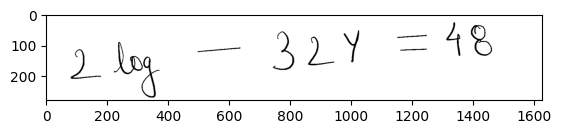

9


In [60]:
if flag == 1:
    input_image = cv2.imread(img_path) 
    ret, bw_img = cv2.threshold(input_image,127,255,cv2.THRESH_BINARY)
    plt.imshow(bw_img)
    plt.show()
    
    cv2.imwrite('equation_images/savedimage.jpg', bw_img)

    input_image_cpy = bw_img.copy()
    keep = detect_contours(image_dir+'savedimage.jpg')
    print(len(keep))
    img_path = image_dir+'savedimage.jpg'
else:
    input_image = cv2.imread(img_path, 0) 
    input_image_cpy = input_image.copy()
    keep = detect_contours(image_dir+IMAGE)
    print(len(keep))

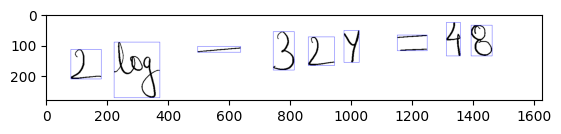

In [61]:
for (x, y, w, h) in keep:
    cv2.rectangle(input_image_cpy, (x, y), (x + w, y + h), (0, 0, 255), 1)
plt.imshow(input_image_cpy, cmap='gray')
plt.show()

In [62]:
def resize_pad(img, size, padColor=255):

    h, w = img.shape[:2]
    sh, sw = size

    # interpolation method
    if h > sh or w > sw: # shrinking image
        interp = cv2.INTER_AREA
    else: # stretching image
        interp = cv2.INTER_CUBIC

    # aspect ratio of image
    aspect = w/h  # if on Python 2, you might need to cast as a float: float(w)/h

    # compute scaling and pad sizing
    if aspect > 1: # horizontal image
        new_w = sw
        new_h = np.round(new_w/aspect).astype(int)
        pad_vert = (sh-new_h)/2
        pad_top, pad_bot = np.floor(pad_vert).astype(int), np.ceil(pad_vert).astype(int)
        pad_left, pad_right = 0, 0
    elif aspect < 1: # vertical image
        new_h = sh
        new_w = np.round(new_h*aspect).astype(int)
        pad_horz = (sw-new_w)/2
        pad_left, pad_right = np.floor(pad_horz).astype(int), np.ceil(pad_horz).astype(int)
        pad_top, pad_bot = 0, 0
    else: # square image
        new_h, new_w = sh, sw
        pad_left, pad_right, pad_top, pad_bot = 0, 0, 0, 0

    # set pad color
    if len(img.shape) == 3 and not isinstance(padColor, (list, tuple, np.ndarray)): # color image but only one color provided
        padColor = [padColor]*3

    # scale and pad
    scaled_img = cv2.resize(img, (new_w, new_h), interpolation=interp)
    scaled_img = cv2.copyMakeBorder(scaled_img, pad_top, pad_bot, pad_left, pad_right, borderType=cv2.BORDER_CONSTANT, value=padColor)

    return scaled_img

In [63]:
new_model = tf.keras.models.load_model('/home/Shivansh/Downloads/KodeKurrent/model_epoch_03.h5')

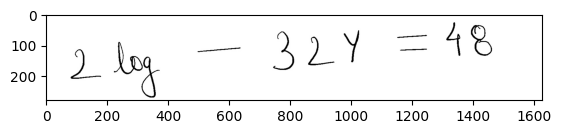

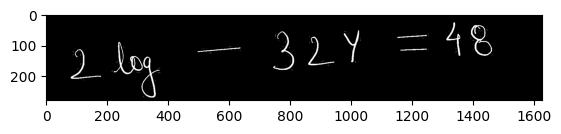

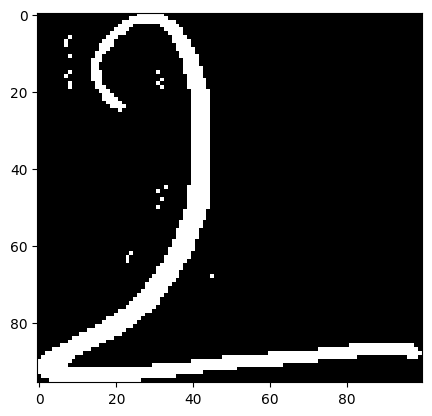

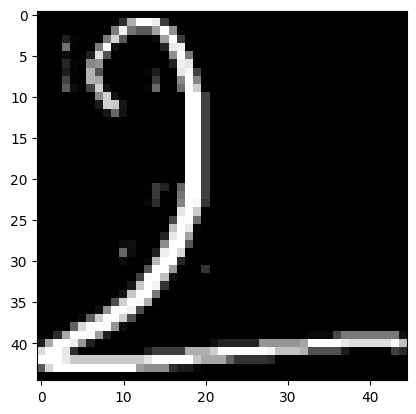

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
X


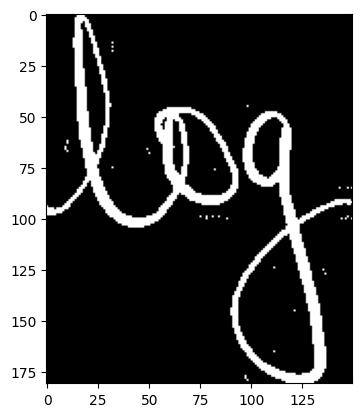

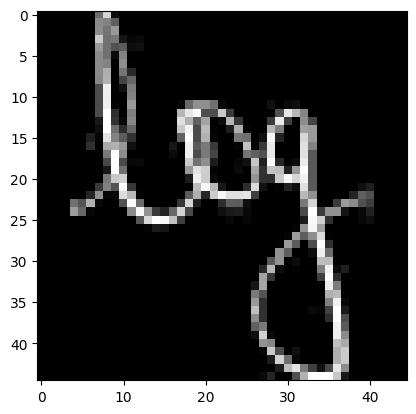

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
log


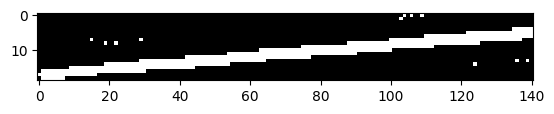

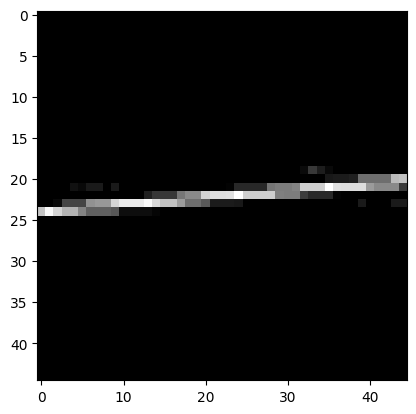

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
-


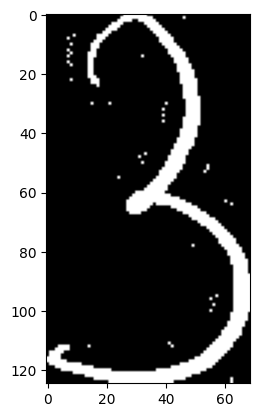

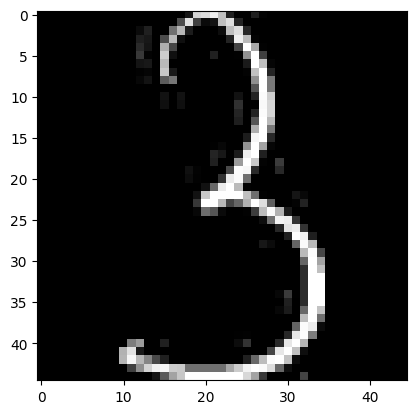

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
3


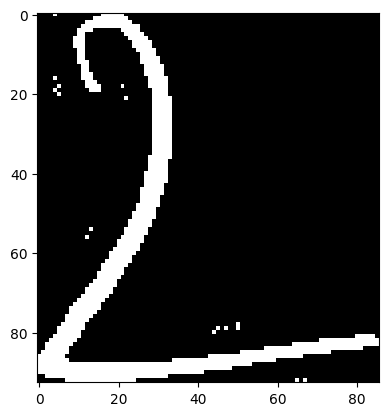

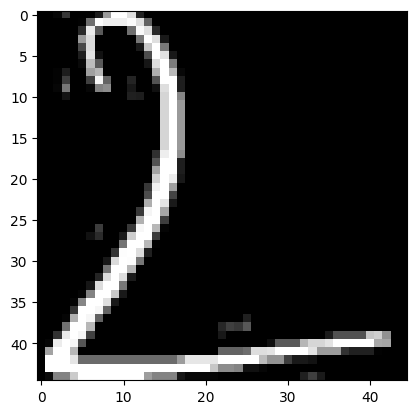

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
X


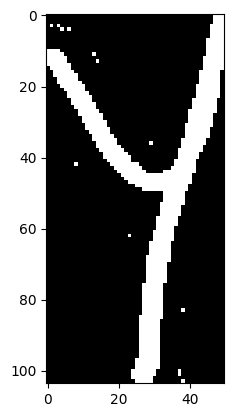

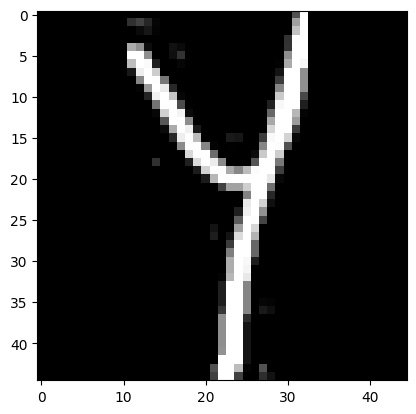

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
y


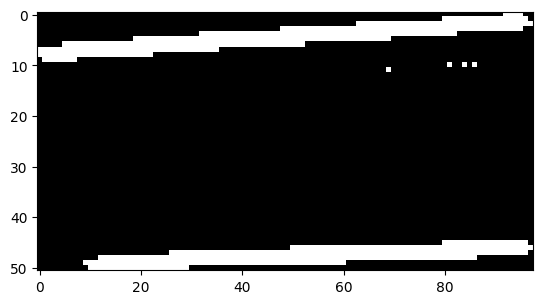

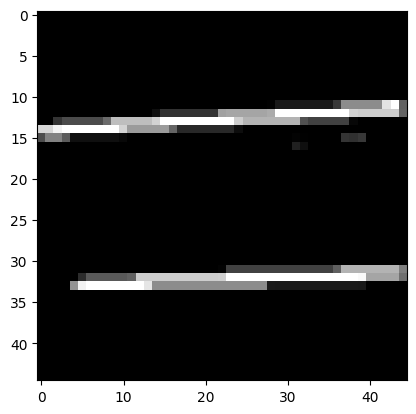

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
=


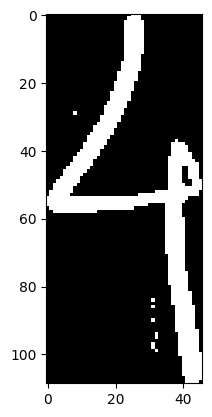

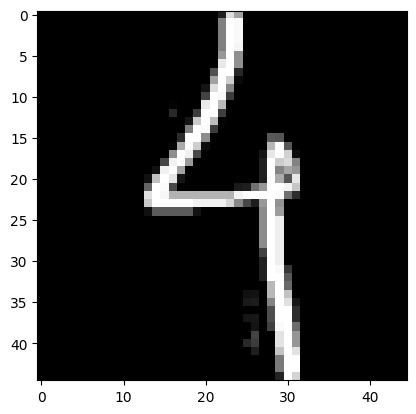

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
4


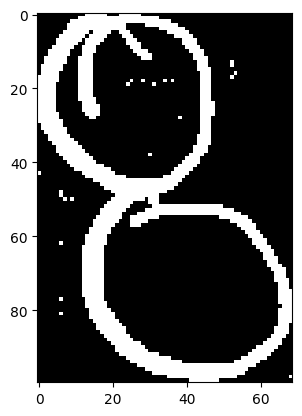

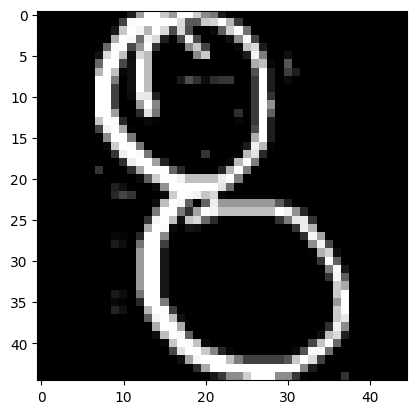

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
y
Xlog-3Xy=4y


In [64]:
eqn_list = []

# binarize the input image
#IMAGE = "testing.png"
#img_path = "equation_images/"+IMAGE
input_image = cv2.imread(img_path, 0) 
inverted_binary_img = binarize(input_image)
plt.imshow(input_image,cmap = 'gray')
#cv2.waitKey(0)
plt.show()
plt.imshow(inverted_binary_img,cmap = 'gray')
plt.show()
#cv2.imshow('res1',inverted_binary_img)
#cv2.waitKey(0)

for (x, y, w, h) in sorted(keep, key = lambda x: x[0]):
    #cv2.imshow('res',inverted_binary_img[y:y+h, x:x+w])
    #cv2.waitKey(0)
    plt.imshow(inverted_binary_img[y:y+h, x:x+w],cmap = 'gray')
    plt.show()
    

    img = resize_pad(inverted_binary_img[y:y+h, x:x+w], (45, 45), 0) # We must use the binarized image to predict
    plt.imshow(img,cmap = 'gray')
    plt.show()
    pred_class = class_names[np.argmax(new_model.predict(tf.expand_dims(tf.expand_dims(img, 0), -1)))]
    if pred_class == "times":
        pred_class = "*"
    eqn_list.append(pred_class)
    print(pred_class)
    #plt.imshow(img)
    #plt.show()
eqn = "".join(eqn_list)
print(eqn)